# Introduction to Linear Regression

We will be using [statsmodels](http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/ols.html) for learning about linear regression. It covers the models better than in scikit when we are learning and want more insights into the model parameters. But we will mainly be using scikit learn for the rest of the course. 

In [1]:
# Import the libraries required
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [9]:
# Read in data
house_data = pd.read_csv("chicagohouseprices2.csv", )

In [10]:
# Summarise the data
house_data.describe()

,Unnamed: 0,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
count,219.000000,219.000000,70.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,109.000000,483431.050228,2.271429,4.663607,9.698630,3.420411,29.424658,873.200913,699.977169,49.197717,486219.119635
std,63.364028,400124.919077,0.883364,1.418146,2.898995,0.352522,49.155880,1392.893683,1175.278922,18.554525,397858.185948
min,0.000000,24500.000000,1.000000,1.090000,6.000000,2.770000,0.000000,0.000000,0.000000,16.700000,28836.500000
25%,54.500000,319000.000000,2.000000,3.940000,8.000000,3.150000,0.000000,0.000000,0.000000,36.100000,307448.750000
50%,109.000000,390000.000000,2.000000,4.930000,9.000000,3.400000,0.000000,0.000000,0.000000,50.000000,391980.000000
75%,163.500000,512500.000000,3.000000,5.580000,10.000000,3.685000,41.000000,2614.000000,1344.000000,59.500000,532475.000000
max,218.000000,3686000.000000,4.000000,8.080000,22.000000,4.200000,131.000000,7405.000000,6422.000000,93.900000,3973508.000000


In [11]:
# Remove the first column that's an index
house_data = house_data.drop('Unnamed: 0', 1)

In [12]:
# Look for any linear correlations in the data
house_data.corr()

,Price,Bath,CrimeIndex,MinutesToLoop,MilesToLake,Age,LotSizeSqft,HouseSizeSqft,SchoolIndex,EstimatedPrice
Price,1.000000,0.113943,0.118667,-0.034644,-0.072433,0.237720,0.443341,0.456272,-0.072403,0.983784
Bath,0.113943,1.000000,0.163785,0.166330,-0.157517,-0.039220,-0.029979,0.698526,-0.047992,0.105632
CrimeIndex,0.118667,0.163785,1.000000,0.194745,0.102382,-0.036644,-0.008807,0.070952,-0.100256,0.122793
MinutesToLoop,-0.034644,0.166330,0.194745,1.000000,0.374829,-0.023820,-0.053292,-0.032437,-0.196728,-0.034185
MilesToLake,-0.072433,-0.157517,0.102382,0.374829,1.000000,-0.047087,0.006240,-0.046517,-0.205966,-0.082604
Age,0.237720,-0.039220,-0.036644,-0.023820,-0.047087,1.000000,0.716774,0.645147,-0.029953,0.255628
LotSizeSqft,0.443341,-0.029979,-0.008807,-0.053292,0.006240,0.716774,1.000000,0.828598,-0.055458,0.454939
HouseSizeSqft,0.456272,0.698526,0.070952,-0.032437,-0.046517,0.645147,0.828598,1.000000,-0.023378,0.471783
SchoolIndex,-0.072403,-0.047992,-0.100256,-0.196728,-0.205966,-0.029953,-0.055458,-0.023378,1.000000,-0.073825
EstimatedPrice,0.983784,0.105632,0.122793,-0.034185,-0.082604,0.255628,0.454939,0.471783,-0.073825,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11454c790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x119c4e950>]], dtype=object)

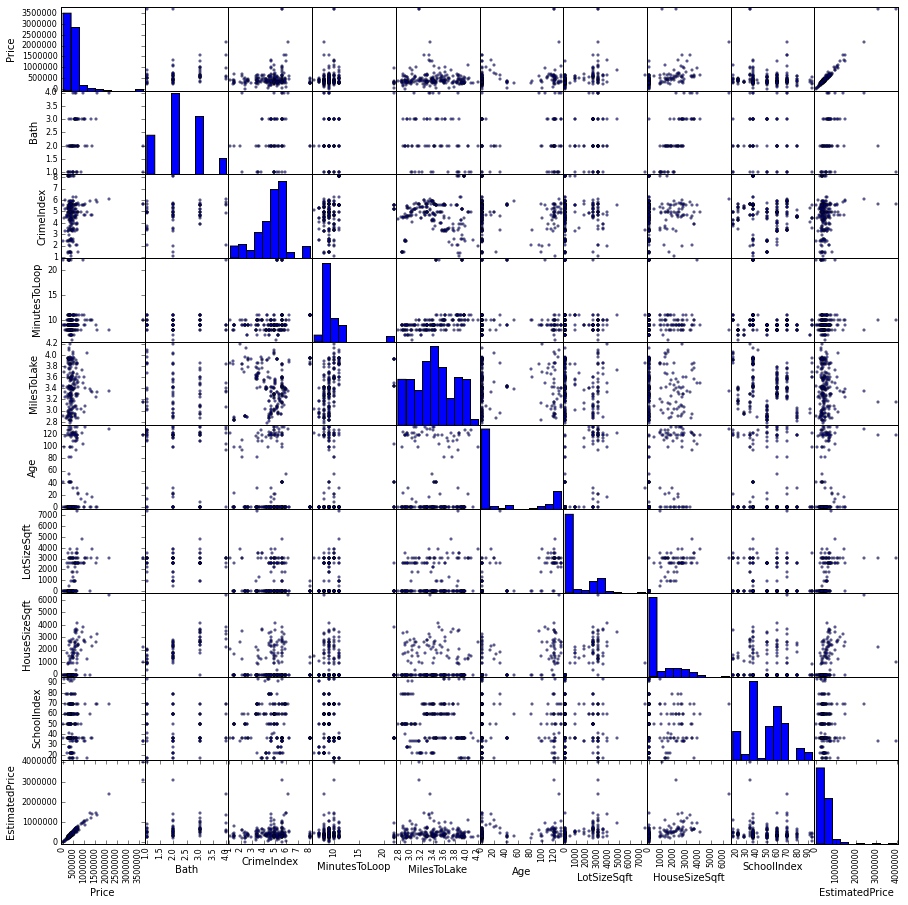

In [13]:
# Plot the data
pd.scatter_matrix(house_data, figsize=(15,15))

### Questions?

- Can you describe the data set - give a summary of what's happening?
- What looks to be affecting house prices from our initial inspection?
- What is the type of relationship in those variables affecting price?

In [14]:
# create a fitted model in one line
lm = smf.ols(formula='Price ~ Bath + HouseSizeSqft', data=house_data).fit()

# print the coefficients
lm.params

Intercept        508310.776747
Bath             -28995.658012
HouseSizeSqft       133.011874
dtype: float64

In [15]:
# What would you expect a house price to be for a house with 3 bathrooms and 350 sqft?
# Calculate it.
508310 -28995.66*3 + 133*350

467873.02

In [16]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.340
Date:                Mon, 04 Apr 2016   Prob (F-statistic):              0.269
Time:                        20:53:39   Log-Likelihood:                -1030.2
No. Observations:                  70   AIC:                             2066.
Df Residuals:                      67   BIC:                             2073.
Df Model:                           2                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      5.083e+05   2.05e+05      2.478      0.016      9.89e+04  9.18e+05
Bath            -2.9e+04   1.16e+05     -0.250      0.803     -2.61e+05  2.03e+05
HouseSizeSqft   133.0119     99.854      1.332      0.187       -66.297   332.321
==============================================================================
Omnibus:                       85.337   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              891.863
Skew:                           3.754   Prob(JB):                    2.16e-194
Kurtosis:                      18.793   Cond. No.                     7.19e+03
==============================================================================

Warnings:
[1] The condition number is large, 7.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# Let's try just the estimated price
# create a fitted model in one line
lm = smf.ols(formula='Price ~ EstimatedPrice ', data=house_data).fit()

# print the coefficients
lm.params

Intercept         2371.037940
EstimatedPrice       0.989389
dtype: float64

In [18]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     6529.
Date:                Mon, 04 Apr 2016   Prob (F-statistic):          6.25e-164
Time:                        20:56:55   Log-Likelihood:                -2758.9
No. Observations:                 219   AIC:                             5522.
Df Residuals:                     217   BIC:                             5529.
Df Model:                           1                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept       2371.0379   7685.764      0.308      0.758     -1.28e+04  1.75e+04
EstimatedPrice     0.9894      0.012     80.801      0.000         0.965     1.014
==============================================================================
Omnibus:                      198.218   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8006.566
Skew:                           3.156   Prob(JB):                         0.00
Kurtosis:                      31.941   Cond. No.                     9.93e+05
==============================================================================

Warnings:
[1] The condition number is large, 9.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# create a DataFrame with the minimum and maximum values of EstimatedPrice
X_new = pd.DataFrame({'EstimatedPrice': [house_data.EstimatedPrice.min(), house_data.EstimatedPrice.max()]})
X_new.head()

In [ ]:
preds = lm.predict(X_new)
preds

In [ ]:
# first, plot the observed data
house_data.plot(kind='scatter', x='EstimatedPrice', y='Price')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

In [ ]:
# Try selecting different variables or combinations of variables. Can you get a better fit?